In [1]:
from __future__ import print_function

In [2]:
import numpy as np
import pandas as pd

from IPython.display import Image

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.cross_validation import train_test_split
from sklearn import svm

from matplotlib import pyplot as plt
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [77]:
digits = datasets.load_digits()
print(digits.data.shape)

(1797, 64)


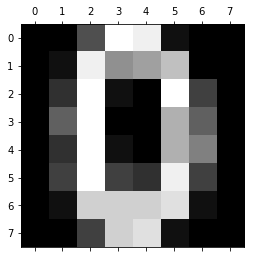

In [78]:
plt.matshow(digits.images[166])
plt.show()

In [79]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    histo = plt.subplot(1,1,1)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a.flatten(), bins= n_bins, lw = 0, alpha=0.5);
   


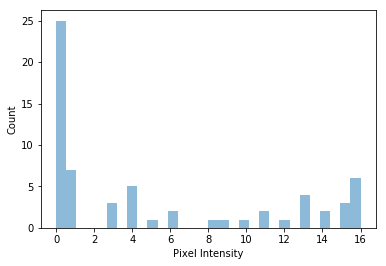

In [80]:
#histogram of unordered values

test = digits.images[166]
plotHistogram(test)

In [125]:
test

array([[ 0.,  0.,  5., 16., 15.,  1.,  0.,  0.],
       [ 0.,  1., 15.,  9., 10., 12.,  0.,  0.],
       [ 0.,  3., 16.,  1.,  0., 16.,  4.,  0.],
       [ 0.,  6., 16.,  0.,  0., 11.,  6.,  0.],
       [ 0.,  3., 16.,  1.,  0., 11.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  3., 15.,  4.,  0.],
       [ 0.,  1., 13., 13., 13., 14.,  1.,  0.],
       [ 0.,  0.,  4., 13., 14.,  1.,  0.,  0.]])

In [116]:
inttest = test.astype(int)
inttest

array([[ 0,  0,  5, 16, 15,  1,  0,  0],
       [ 0,  1, 15,  9, 10, 12,  0,  0],
       [ 0,  3, 16,  1,  0, 16,  4,  0],
       [ 0,  6, 16,  0,  0, 11,  6,  0],
       [ 0,  3, 16,  1,  0, 11,  8,  0],
       [ 0,  4, 16,  4,  3, 15,  4,  0],
       [ 0,  1, 13, 13, 13, 14,  1,  0],
       [ 0,  0,  4, 13, 14,  1,  0,  0]])

In [72]:
test

array([[ 0.,  0.,  5., 16., 15.,  1.,  0.,  0.],
       [ 0.,  1., 15.,  9., 10., 12.,  0.,  0.],
       [ 0.,  3., 16.,  1.,  0., 16.,  4.,  0.],
       [ 0.,  6., 16.,  0.,  0., 11.,  6.,  0.],
       [ 0.,  3., 16.,  1.,  0., 11.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  3., 15.,  4.,  0.],
       [ 0.,  1., 13., 13., 13., 14.,  1.,  0.],
       [ 0.,  0.,  4., 13., 14.,  1.,  0.,  0.]])

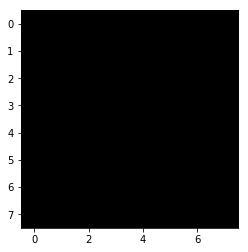

In [135]:
#convert to an image
from PIL import Image
image = Image.fromarray(test, '1')

plt.imshow(image)

In [136]:
(2==4) | (4==4) 

True

In [127]:

hog_vec, hog_vis = hog(test, visualise=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


ValueError: negative dimensions are not allowed